In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
PATH = "nyc-rolling-sales.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
clean_df = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1)

In [16]:
clean_df.duplicated().sum()

2751

In [17]:
clean_df = clean_df.drop_duplicates()

In [19]:
clean_df.replace(' -  ', 0,  inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [18]:
clean_df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [27]:
clean_df['BOROUGH_NAME'] = clean_df['BOROUGH'].astype(str)
clean_df['BOROUGH_NAME'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


In [28]:
clean_df.drop(['BOROUGH'], axis=1, inplace=True)

In [30]:
clean_df['SALE DATE'] = pd.to_datetime(clean_df['SALE DATE'])
clean_df['SALE_MONTH']= clean_df['SALE DATE'].dt.month
clean_df['SALE_YEAR']= clean_df['SALE DATE'].dt.year
clean_df['SALE_DAY']= clean_df['SALE DATE'].dt.day

clean_df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_MONTH,SALE_YEAR,SALE_DAY
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,7,2017,19
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan,12,2016,14
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan,12,2016,9
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,9,2016,23
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,11,2016,17


<AxesSubplot:>

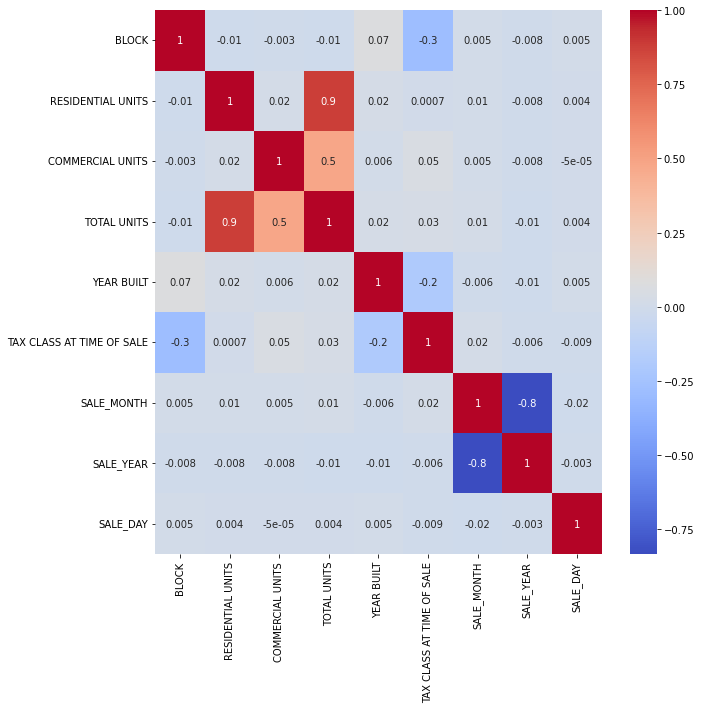

In [31]:
corr = clean_df.corr()

plt.figure(figsize=(10,10)) 
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')

In [32]:
clean_df.to_csv('clean_nyc-rolling-sales.csv', index=False)